In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from hdf5manager import *
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.figure
import itertools

C:\Users\ashwi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [163]:
def parseAndDrawHDF5(filepath):
    f = hdf5manager(filepath)
    data = f.load()

    foot1_data = data["foot1"]
    foot2_data = data["foot2"]
    foot3_data = data["foot3"]
    foot4_data = data["foot4"]
    #head_data = data["head"]
    #tail_data = data["tail"]

    foot1_x = foot1_data["x"]
    foot1_y = foot1_data["y"]
    foot1_dx = foot1_data["dx"]
    foot1_dy = foot1_data["dy"]
    foot1_mag = foot1_data["magnitude"]
    foot1_angle = foot1_data["angle"]

    foot2_x = foot2_data["x"]
    foot2_y = foot2_data["y"]
    foot2_dx = foot2_data["dx"]
    foot2_dy = foot2_data["dy"]
    foot2_mag = foot2_data["magnitude"]
    foot2_angle = foot2_data["angle"]

    foot3_x = foot3_data["x"]
    foot3_y = foot3_data["y"]
    foot3_dx = foot3_data["dx"]
    foot3_dy = foot3_data["dy"]
    foot3_mag = foot3_data["magnitude"]
    foot3_angle = foot3_data["angle"]

    foot4_x = foot4_data["x"]
    foot4_y = foot4_data["y"]
    foot4_dx = foot4_data["dx"]
    foot4_dy = foot4_data["dy"]
    foot4_mag = foot4_data["magnitude"]
    foot4_angle = foot4_data["angle"]
'''
    head_x = head_data["x"]
    head_y = head_data["y"]
    head_dx = head_data["dx"]
    head_dy = head_data["dy"]
    head_mag = head_data["magnitude"]
    head_angle = head_data["angle"]

    tail_x = tail_data["x"]
    tail_y = tail_data["y"]
    tail_dx = tail_data["dx"]
    tail_dy = tail_data["dy"]
    tail_mag = tail_data["magnitude"]
    tail_angle = tail_data["angle"]
'''

    def drawVectorForFrame(figure, frameNumber):
        sub = figure.add_subplot(131)

        vecXPositions = [-1,1,-1,1]
        vecYPositions = [1,1,1,1]

        dxVals = [foot1_dx[frameNumber], foot2_dx[frameNumber], foot3_dx[frameNumber], foot4_dx[frameNumber]]#add in head_dx[frameNumber], tail_dx[frameNumber]
        dyVals = [foot1_dy[frameNumber], foot2_dy[frameNumber], foot3_dy[frameNumber], foot4_dy[frameNumber]]#add in head_dy[frameNumber], tail_dy[frameNumber]

        sub.quiver(xPositions,yPositions,dxVals, dyVals, angles='xy', scale_units='xy', scale=1)

        sub.set_xlabel('x')
        sub.set_ylabel('y')

        sub.set_xlim(-5,5)
        sub.set_ylim(-5,5)
        
        sub2 = figure.add_subplot(132)
        xPos = [foot1_x[frameNumber], foot2_x[frameNumber], foot3_x[frameNumber], foot4_x[frameNumber]]#add in head_x[frameNumber], tail_x[frameNumber]'''
        yPos = [foot1_y[frameNumber], foot2_y[frameNumber], foot3_y[frameNumber], foot4_xy[frameNumber]]#add in head_x[frameNumber], tail_x[frameNumber]       
        sub2.scatter(xPos,yPos)
        
        sub2.set_xlim(-5,5)
        sub2.set_ylim(-5,5)
        
        

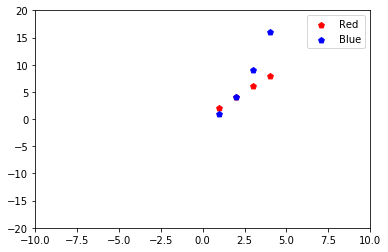

In [18]:
x = [1,2,3,4]
y = [2,4,6,8]
y2 = [1,4,9,16]
labels = ('Red', 'Blue')
plt.scatter(x,y,c = 'red', marker = 'p'),plt.scatter(x,y2, c = 'blue', marker = 'p'),plt.legend(labels)
#plt.plot(1, -1, marker='o', markersize=3, color="red")
plt.xlim(-10,10)
plt.ylim(-20,20)
plt.show()

In [19]:
xvals = []
yvals = []
for i in range(1,10):
    xvals.append(i)
    yvals.append(i*i)

In [1]:
plt.plot(xvals,yvals,'bs')
plt.xlabel('Numbers')
plt.ylabel('Squares')
plt.show()

NameError: name 'plt' is not defined

In [21]:
test_dict = {"foot_x":[1,2,3,4], "foot_y":[2,4,6,8], "foot_magnitude":[0.5,1.0,1.5,2.0],"foot_angle":[0.244,0.566,0.764,0.987]}
for parameter in test_dict:
    print(parameter + ":\t", end = " ")
    for i in range(len(test_dict[parameter])):
        print(str(test_dict[parameter][i]), end = " ")
    print()

foot_x:	 1 2 3 4 
foot_y:	 2 4 6 8 
foot_magnitude:	 0.5 1.0 1.5 2.0 
foot_angle:	 0.244 0.566 0.764 0.987 


No target key specified; loading all datasets

Loading datasets from hdf5 file:
	 foot_x; void
		- loading foot_x from file...
	 foot_y; void
		- loading foot_y from file...
	 foot_magnitude; void
		- loading foot_magnitude from file...
	 foot_angle; void
		- loading foot_angle from file...
	 frame; void
		- loading frame from file...
Keys extracted from file:
	 foot_x, foot_y, foot_magnitude, foot_angle, frame





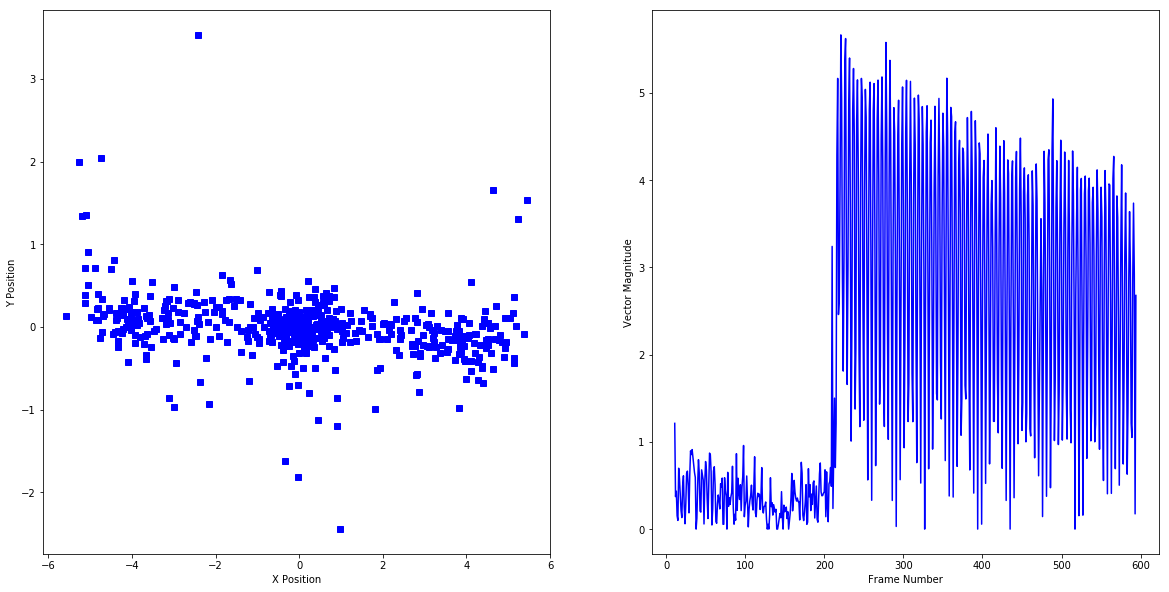

In [29]:
filepath = "testHDF5.hdf5"
f = hdf5manager(filepath)
data = f.load()

#f.print()
keys = data.keys()
#print (len(keys))

foot_x = data["foot_x"]
foot_y = data["foot_y"]
foot_mag = data["foot_magnitude"]
frame = data["frame"]
foot_theta = data["foot_angle"]

for i, mag in enumerate(foot_mag):
    if mag > 25:
        foot_x.pop(i)
        foot_y.pop(i)
        foot_mag.pop(i)
        frame.pop(i)
        foot_theta.pop(i)
        
pos, mag = plt.subplots(figsize=(20, 10))
plt.subplot(121),plt.plot(foot_x,foot_y,'bs'),plt.xlabel('X Position'), plt.ylabel('Y Position')
plt.subplot(122),plt.plot(frame,foot_mag,'b-'),plt.xlabel('Frame Number'), plt.ylabel('Vector Magnitude')
plt.show()

No target key specified; loading all datasets

Loading datasets from hdf5 file:
	 foot_x; void
		- loading foot_x from file...
	 foot_y; void
		- loading foot_y from file...
	 foot_magnitude; void
		- loading foot_magnitude from file...
	 foot_angle; void
		- loading foot_angle from file...
	 frame; void
		- loading frame from file...
Keys extracted from file:
	 foot_x, foot_y, foot_magnitude, foot_angle, frame





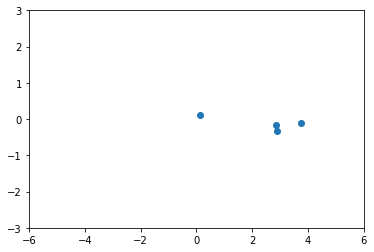

In [38]:
filepath = "testHDF5.hdf5"
f = hdf5manager(filepath)
data = f.load()

foot_x = data["foot_x"]
foot_y = data["foot_y"]
foot_mag = data["foot_magnitude"]
frame = data["frame"]
foot_theta = data["foot_angle"]

for i, mag in enumerate(foot_mag):
    if mag > 25:
        foot_x.pop(i)
        foot_y.pop(i)
        foot_mag.pop(i)
        frame.pop(i)
        foot_theta.pop(i)

fig, ax = plt.subplots()
mat, = ax.plot(foot_x[0], foot_y[0], 'o')

def animate(i):
    extra = 4
    if i < 4:
        extra = i
    
    mat.set_data(foot_x[i-extra:i], foot_y[i-extra:i])
    return mat,

ax.axis([-6,6,-3,3])
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(foot_x), interval=200, blit=True)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

No target key specified; loading all datasets

Loading datasets from hdf5 file:
	 foot_x; void
		- loading foot_x from file...
	 foot_y; void
		- loading foot_y from file...
	 foot_magnitude; void
		- loading foot_magnitude from file...
	 foot_angle; void
		- loading foot_angle from file...
	 frame; void
		- loading frame from file...
Keys extracted from file:
	 foot_x, foot_y, foot_magnitude, foot_angle, frame





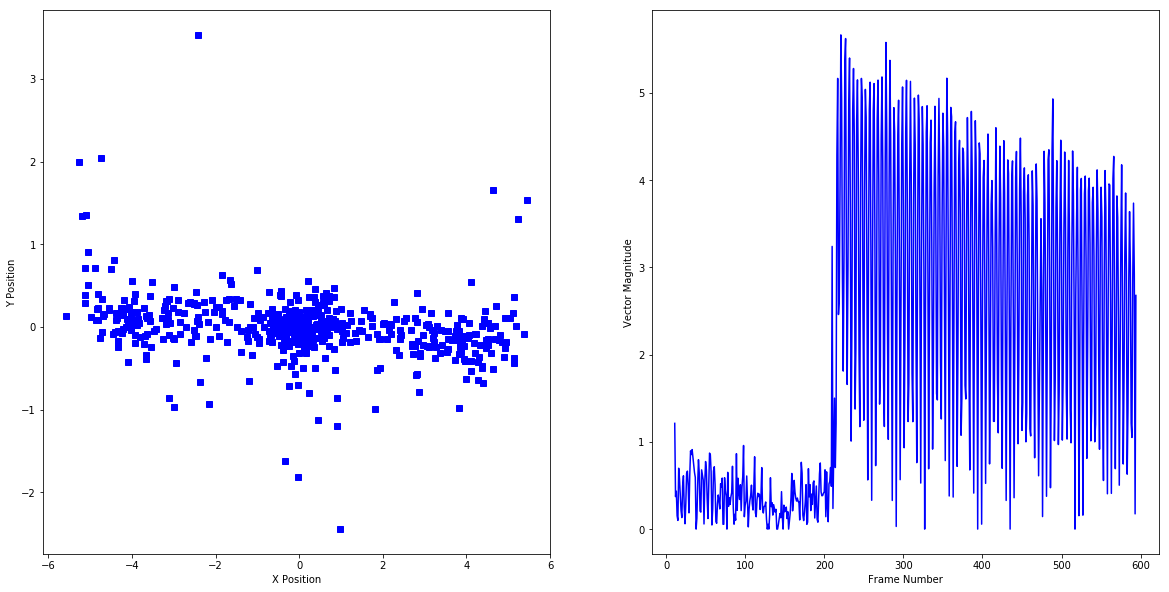

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [50]:
filepath = "testHDF5.hdf5"
f = hdf5manager(filepath)
data = f.load()

foot_x = data["foot_x"]
foot_y = data["foot_y"]
foot_mag = data["foot_magnitude"]
frame = data["frame"]
foot_theta = data["foot_angle"]

for i, mag in enumerate(foot_mag):
    if mag > 25:
        foot_x.pop(i)
        foot_y.pop(i)
        foot_mag.pop(i)
        frame.pop(i)
        foot_theta.pop(i)
        

fig = plt.figure(figsize=(10, 5))
canvas = FigureCanvas(fig)

pos, mag = plt.subplots(figsize=(20, 10))
plt.subplot(121),plt.plot(foot_x,foot_y,'bs'),plt.xlabel('X Position'), plt.ylabel('Y Position')
plt.subplot(122),plt.plot(frame,foot_mag,'b-'),plt.xlabel('Frame Number'), plt.ylabel('Vector Magnitude')
plt.show()

canvas.draw()
width, height = fig.get_size_inches() * fig.get_dpi()
image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)